In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [2]:
Train_Dir = '/content/drive/MyDrive/Ai_project/AI/training.csv'
Test_Dir = '/content/drive/MyDrive/Ai_project/AI/test.csv'
lookid_dir = '/content/drive/MyDrive/Ai_project/AI/IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)
os.listdir('/content/drive/MyDrive/Ai_project/AI/input')

[]

In [3]:
train_data.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [4]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [5]:
train_data.fillna(method = 'ffill',inplace = True)
# train_data.reset_index(drop = True,inplace = True)

In [6]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [7]:
imag = []
for i in range(0,len(train_data['Image'])-1):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [8]:
image_list = np.array(imag, dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

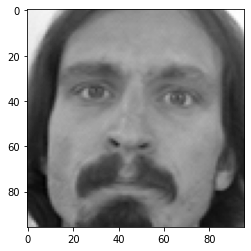

In [9]:
plt.imshow(X_train[0].reshape(96,96),cmap='gray')
plt.show()

In [10]:
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,len(train_data['Image'])-1):
    y = training.iloc[i,:]
    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

In [11]:
print(y_train[0])

[66.03356391 39.00227368 30.22700752 36.4216782  59.58207519 39.64742256
 73.13034586 39.96999699 36.35657143 37.3894015  23.45287218 37.3894015
 56.95326316 29.03364812 80.22712782 32.22813835 40.22760902 29.0023218
 16.35637895 29.64747068 44.42057143 57.06680301 61.19530827 79.97016541
 28.61449624 77.38899248 43.3126015  72.93545865 43.13070677 84.48577444]


In [12]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        288       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9216      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                        

In [13]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [14]:
history=model.fit(X_train,y_train,epochs = 250,batch_size = 32,validation_split = 0.2)

Epoch 1/250
177/177 [==============================] - 22s 45ms/step - loss: 66.9142 - accuracy: 0.3606 - val_loss: 43.4006 - val_accuracy: 0.6879
Epoch 2/250
177/177 [==============================] - 7s 39ms/step - loss: 16.6431 - accuracy: 0.5433 - val_loss: 13.9089 - val_accuracy: 0.6936
Epoch 3/250
177/177 [==============================] - 7s 39ms/step - loss: 14.4999 - accuracy: 0.6208 - val_loss: 8.9564 - val_accuracy: 0.7589
Epoch 4/250
177/177 [==============================] - 7s 39ms/step - loss: 11.6524 - accuracy: 0.6653 - val_loss: 4.1049 - val_accuracy: 0.7227
Epoch 5/250
177/177 [==============================] - 7s 39ms/step - loss: 11.2438 - accuracy: 0.6781 - val_loss: 8.7269 - val_accuracy: 0.7532
Epoch 6/250
177/177 [==============================] - 7s 40ms/step - loss: 10.2205 - accuracy: 0.7066 - val_loss: 4.4489 - val_accuracy: 0.7007
Epoch 7/250
177/177 [==============================] - 7s 40ms/step - loss: 9.6508 - accuracy: 0.7251 - val_loss: 10.4382 - val

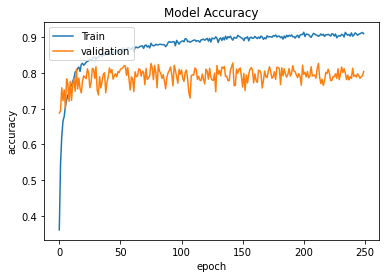

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [16]:
model.save('/content/drive/MyDrive/Ai_project/AI/model.h5')

In [17]:
#preparing test data
timag = []
for i in range(0,len(test_data['Image'])-1):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

In [18]:
timage_list = np.array(timag, dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 

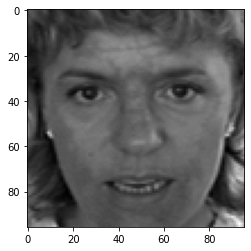

In [19]:
plt.imshow(X_test[1].reshape(96,96),cmap = 'gray')
plt.show()

In [20]:
from keras.saving.save import load_model
model = load_model("/content/drive/MyDrive/Ai_project/AI/model.h5")

In [21]:
pred = model.predict(X_test)

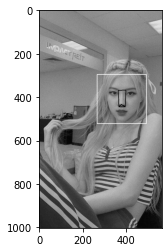

In [23]:
#anh
import cv2

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Ai_project/AI/haarcascade_frontalface_default.xml')

img = cv2.imread('/content/drive/MyDrive/Ai_project/AI/anh_test/roses.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(img, 1.1, 4)
maxx = maxy = maxw = maxh = 0
for (x, y, w, h) in faces:
    if (w*h > maxw*maxh):
      maxx = x
      maxy = y
      maxw = w
      maxh = h
cv2.rectangle(img, (maxx, maxy), (maxx+maxw, maxy+maxh), (255, 0, 0), 2)
maxh = maxw = max(maxh, maxw)
crop_img = img[maxy:maxy+maxh, maxx:maxx+maxw]

scale = maxw/96.0
X = cv2.resize(crop_img, (96, 96), interpolation = cv2.INTER_AREA)
X = np.array([X], dtype = 'float')
X = X.reshape(-1,96,96,1)

pred = model.predict(X)

nose_point = [
              [pred[0][16],pred[0][17]],
              [pred[0][12],pred[0][13]],
              [(pred[0][22]+pred[0][26])/2, (pred[0][13]+96)/2],
              [pred[0][20],pred[0][21]],
              [(pred[0][24]+pred[0][28])/2, (pred[0][17]+96)/2],
              [(pred[0][22]+pred[0][26])/2, (pred[0][13]+96)/2],
              [(pred[0][24]+pred[0][28])/2, (pred[0][17]+96)/2]
            ]
for i in range(0, len(nose_point)):
  nose_point[i][0]=int(nose_point[i][0]*scale)+maxx
  nose_point[i][1]=int(nose_point[i][1]*scale)+maxy
nose_point = np.array(nose_point, np.int32)
nose_point = nose_point.reshape((-1, 1, 2))

img = cv2.polylines(img, [nose_point], 
                      True, (0), 2)
plt.imshow(img, cmap = 'gray')
plt.show() 

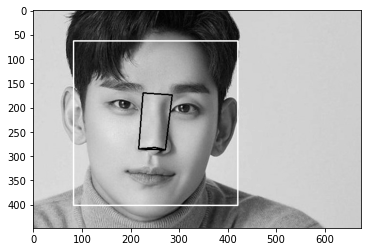

In [24]:
#anh
import cv2

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Ai_project/AI/haarcascade_frontalface_default.xml')

img = cv2.imread('/content/drive/MyDrive/Ai_project/AI/anh_test/test_mat.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(img, 1.1, 4)
maxx = maxy = maxw = maxh = 0
for (x, y, w, h) in faces:
    if (w*h > maxw*maxh):
      maxx = x
      maxy = y
      maxw = w
      maxh = h
cv2.rectangle(img, (maxx, maxy), (maxx+maxw, maxy+maxh), (255, 0, 0), 2)
maxh = maxw = max(maxh, maxw)
crop_img = img[maxy:maxy+maxh, maxx:maxx+maxw]

scale = maxw/96.0
X = cv2.resize(crop_img, (96, 96), interpolation = cv2.INTER_AREA)
X = np.array([X], dtype = 'float')
X = X.reshape(-1,96,96,1)

pred = model.predict(X)

nose_point = [
              [pred[0][16],pred[0][17]],
              [pred[0][12],pred[0][13]],
              [(pred[0][22]+pred[0][26])/2, (pred[0][13]+96)/2],
              [pred[0][20],pred[0][21]],
              [(pred[0][24]+pred[0][28])/2, (pred[0][17]+96)/2],
              [(pred[0][22]+pred[0][26])/2, (pred[0][13]+96)/2],
              [(pred[0][24]+pred[0][28])/2, (pred[0][17]+96)/2]
            ]
for i in range(0, len(nose_point)):
  nose_point[i][0]=int(nose_point[i][0]*scale)+maxx
  nose_point[i][1]=int(nose_point[i][1]*scale)+maxy
nose_point = np.array(nose_point, np.int32)
nose_point = nose_point.reshape((-1, 1, 2))

img = cv2.polylines(img, [nose_point], 
                      True, (0), 2)
plt.imshow(img, cmap = 'gray')
plt.show() 

In [34]:
#video
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Ai_project/AI/haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture('/content/drive/MyDrive/Ai_project/AI/anh_test/test_video.mp4')

if (cap.isOpened()== False): 
  print("Error opening video stream or file")

count = 0
# grab the width, height, and fps of the frames in the video stream.
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# initialize the FourCC and a video writer object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output = cv2.VideoWriter('output.mp4', fourcc, fps, (frame_width, frame_height))

while(cap.isOpened()):
  ret, frame = cap.read()
  if ret == True:
    count += 1
    print(count)
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.1, 4)
    maxx = maxy = maxw = maxh = 0
    for (x, y, w, h) in faces:
        if (w*h > maxw*maxh):
          maxx = x
          maxy = y
          maxw = w
          maxh = h
    cv2.rectangle(img, (maxx, maxy), (maxx+maxw, maxy+maxh), (255, 0, 0), 2)
    maxh = maxw = max(maxh, maxw)
    crop_img = img[maxy:maxy+maxh, maxx:maxx+maxw]

    scale = maxw/96.0
    #X = cv2.resize(crop_img, (96, 96), interpolation = cv2.INTER_AREA)
    X = np.array([X], dtype = 'float')
    X = X.reshape(-1,96,96,1)

    pred = model.predict(X)

    nose_point = [
                  [pred[0][16],pred[0][17]],
                  [pred[0][12],pred[0][13]],
                  [(pred[0][22]+pred[0][26])/2, (pred[0][13]+96)/2],
                  [pred[0][20],pred[0][21]],
                  [(pred[0][24]+pred[0][28])/2, (pred[0][17]+96)/2],
                  [(pred[0][22]+pred[0][26])/2, (pred[0][13]+96)/2],
                  [(pred[0][24]+pred[0][28])/2, (pred[0][17]+96)/2]
                ]
    for i in range(0, len(nose_point)):
      nose_point[i][0]=int(nose_point[i][0]*scale)+maxx
      nose_point[i][1]=int(nose_point[i][1]*scale)+maxy
    nose_point = np.array(nose_point, np.int32)
    nose_point = nose_point.reshape((-1, 1, 2))

    frame = cv2.polylines(frame, [nose_point], 
                          True, (255,255,255), 2)
    output.write(frame)
  else: 
    break

cap.release()
output.release()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
